Primeras filas de los datos:
fecha
2009-01-01    30715
2010-01-01    30671
2011-01-01    30766
2012-01-01    33127
2013-01-01    33130
Name: Cantidad, dtype: int64

Últimas filas de los datos:
fecha
2018-12-01    31736
2019-12-01    28301
2020-12-01    26076
2021-12-01    29452
2022-12-01    29010
Name: Cantidad, dtype: int64


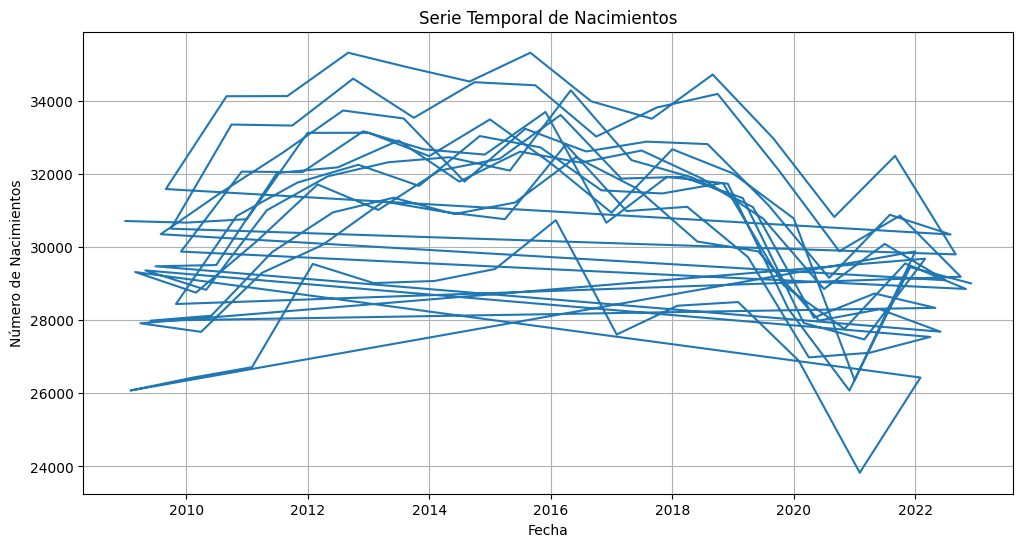

c:\Users\Oscar Escriba\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 147ms/step - loss: 0.3481 - val_loss: 0.2396
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.1494 - val_loss: 0.0558
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0492 - val_loss: 0.0577
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0594 - val_loss: 0.0422
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0485 - val_loss: 0.0334
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0417 - val_loss: 0.0422
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0422 - val_loss: 0.0418
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0401 - val_loss: 0.0352
Epoch 9/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0361 - val_loss: 0.0321
Epoch 10/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0394 - val_loss: 0.0333
Epoch 11/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0377 - val_loss: 0.0320
Epoch 12/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0329 - val_l

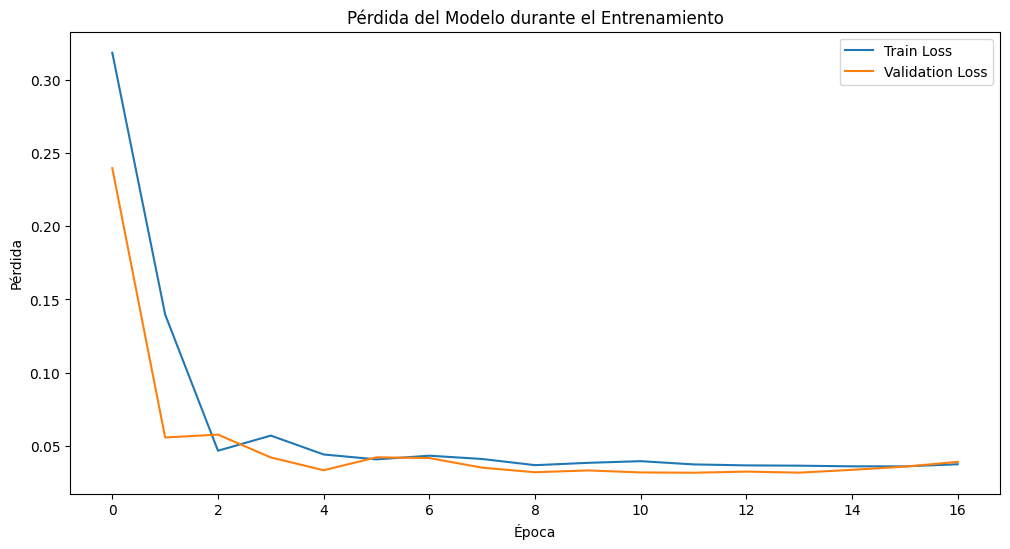

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Train RMSE (LSTM): 2197.80
Test RMSE (LSTM): 2047.81


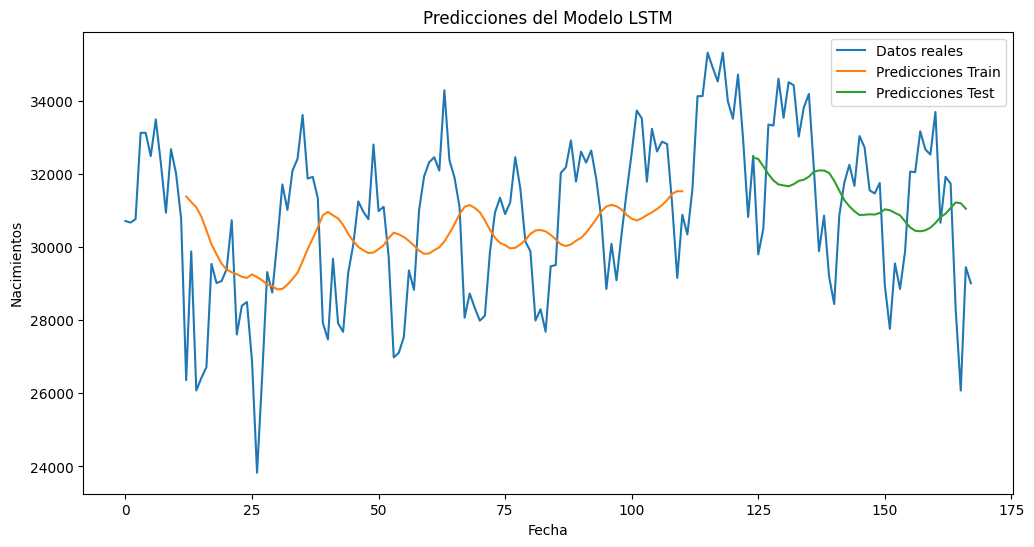

c:\Users\Oscar Escriba\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Oscar Escriba\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Oscar Escriba\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Oscar Escriba\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has

Test RMSE (ARIMA): 2517.85
Test RMSE (Holt-Winters): 2333.72


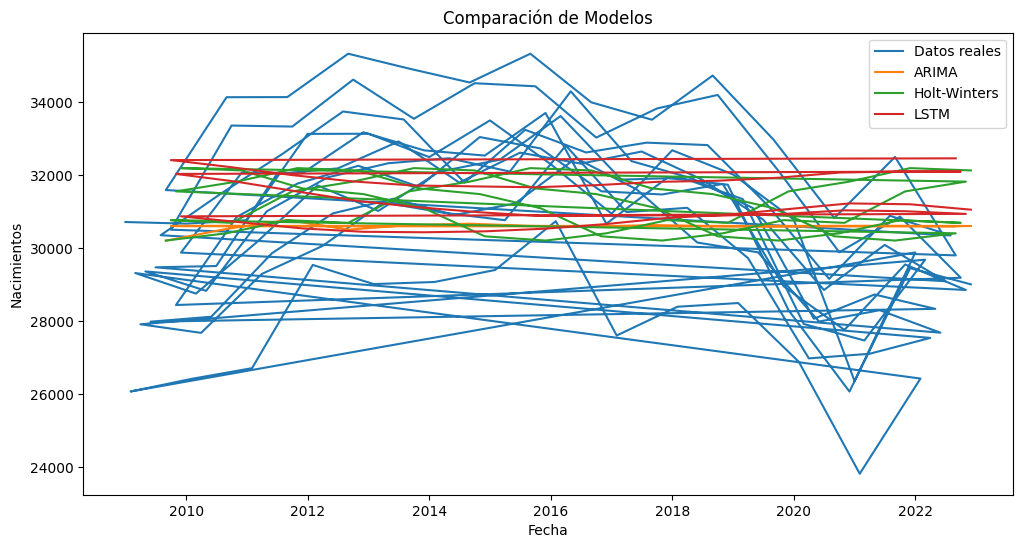

         Modelo   RMSE Train    RMSE Test
0          LSTM  2197.798438  2047.812780
1         ARIMA          NaN  2517.848492
2  Holt-Winters          NaN  2333.715855


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping

# Cargar los datos desde el archivo CSV
try:
    # Leer el archivo CSV
    data = pd.read_csv('nacXanioMes.csv', parse_dates=['fecha'])
    # Convertir a serie temporal con fecha como índice
    births = data.set_index('fecha')['Cantidad']
    
    # Verificar que los datos se cargaron correctamente
    print("Primeras filas de los datos:")
    print(births.head())
    print("\nÚltimas filas de los datos:")
    print(births.tail())
    
except FileNotFoundError:
    print("Error: No se encontró el archivo 'nacXanio.csv'")
    print("Asegúrate de que el archivo esté en el mismo directorio que tu notebook")
    raise
except Exception as e:
    print(f"Error al cargar el archivo: {str(e)}")
    raise

# Visualizar la serie temporal
plt.figure(figsize=(12, 6))
plt.plot(births)
plt.title('Serie Temporal de Nacimientos')
plt.xlabel('Fecha')
plt.ylabel('Número de Nacimientos')
plt.grid(True)
plt.show() 

# Preprocesamiento de datos
scaler = MinMaxScaler(feature_range=(0, 1))
births_scaled = scaler.fit_transform(births.values.reshape(-1, 1))

# Función para crear secuencias para LSTM
def create_dataset(data, look_back=1):
    X, y = [], []
    for i in range(len(data)-look_back-1):
        X.append(data[i:(i+look_back), 0])
        y.append(data[i + look_back, 0])
    return np.array(X), np.array(y)

# Dividir en train y test
train_size = int(len(births_scaled) * 0.67)
test_size = len(births_scaled) - train_size
train, test = births_scaled[0:train_size,:], births_scaled[train_size:len(births_scaled),:]

# Crear conjuntos de datos para LSTM
look_back = 12
X_train, y_train = create_dataset(train, look_back)
X_test, y_test = create_dataset(test, look_back)

# Reshape para LSTM [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Crear y entrenar modelo LSTM
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(look_back, 1)))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(
    X_train, y_train, 
    validation_data=(X_test, y_test),
    epochs=100, 
    batch_size=32, 
    verbose=1,
    callbacks=[early_stop]
)

# Graficar pérdida durante el entrenamiento
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Pérdida del Modelo durante el Entrenamiento')
plt.ylabel('Pérdida')
plt.xlabel('Época')
plt.legend()
plt.show()

# Hacer predicciones con LSTM
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Invertir escalamiento
train_predict = scaler.inverse_transform(train_predict)
y_train = scaler.inverse_transform([y_train])
test_predict = scaler.inverse_transform(test_predict)
y_test = scaler.inverse_transform([y_test])

# Calcular RMSE
train_rmse = np.sqrt(mean_squared_error(y_train[0], train_predict[:,0]))
test_rmse = np.sqrt(mean_squared_error(y_test[0], test_predict[:,0]))
print(f'Train RMSE (LSTM): {train_rmse:.2f}')
print(f'Test RMSE (LSTM): {test_rmse:.2f}')

# Graficar predicciones
train_predict_plot = np.empty_like(births_scaled)
train_predict_plot[:, :] = np.nan
train_predict_plot[look_back:len(train_predict)+look_back, :] = train_predict

test_predict_plot = np.empty_like(births_scaled)
test_predict_plot[:, :] = np.nan
test_predict_plot[len(train_predict)+(look_back*2)+1:len(births_scaled)-1, :] = test_predict

plt.figure(figsize=(12, 6))
plt.plot(scaler.inverse_transform(births_scaled), label='Datos reales')
plt.plot(train_predict_plot, label='Predicciones Train')
plt.plot(test_predict_plot, label='Predicciones Test')
plt.title('Predicciones del Modelo LSTM')
plt.xlabel('Fecha')
plt.ylabel('Nacimientos')
plt.legend()
plt.show()

# Modelos tradicionales para comparación

# ARIMA
arima_model = ARIMA(births[:train_size], order=(5,1,0))
arima_model_fit = arima_model.fit()
arima_predictions = arima_model_fit.forecast(steps=test_size)

# Holt-Winters
hw_model = ExponentialSmoothing(births[:train_size], seasonal='add', seasonal_periods=12)
hw_model_fit = hw_model.fit()
hw_predictions = hw_model_fit.forecast(test_size)

# Calcular RMSE para modelos tradicionales
arima_rmse = np.sqrt(mean_squared_error(births[train_size:], arima_predictions))
hw_rmse = np.sqrt(mean_squared_error(births[train_size:], hw_predictions))
print(f'Test RMSE (ARIMA): {arima_rmse:.2f}')
print(f'Test RMSE (Holt-Winters): {hw_rmse:.2f}')

# Graficar comparación de modelos
plt.figure(figsize=(12, 6))
plt.plot(births, label='Datos reales')
plt.plot(births.index[train_size:], arima_predictions, label='ARIMA')
plt.plot(births.index[train_size:], hw_predictions, label='Holt-Winters')
plt.plot(births.index[train_size+look_back+1:train_size+look_back+1+len(test_predict)], 
         test_predict, label='LSTM')
plt.title('Comparación de Modelos')
plt.xlabel('Fecha')
plt.ylabel('Nacimientos')
plt.legend()
plt.show()

# Resumen de resultados
results = pd.DataFrame({
    'Modelo': ['LSTM', 'ARIMA', 'Holt-Winters'],
    'RMSE Train': [train_rmse, np.nan, np.nan],
    'RMSE Test': [test_rmse, arima_rmse, hw_rmse]
})
print(results)

